# Importing Necessary Libraries
This section imports all the necessary libraries required for the rest of the notebook.

In [70]:
import IPython
import sys

def clean_notebook():
    IPython.display.clear_output(wait=True)
    print("Notebook cleaned.")

# Run the installation commands

!pip install openai
!pip install gradio
!pip install tiktoken
!pip install faiss-gpu
!pip install  datasets
# Clean up the notebook
clean_notebook()

Notebook cleaned.


In [81]:

import openai
openai.api_key = "code"

# Downloading Dataset
This section downloads the dataset using the wget command.

In [2]:
 !wget -nc https://raw.githubusercontent.com/Tuchsanai/AIMaster-seagate-training-2024/6a91fb201929394a4c640ed32a29b69136c1a6f7/Dataset/bbc_text_cls.csv


--2024-06-02 10:21:55--  https://raw.githubusercontent.com/Tuchsanai/AIMaster-seagate-training-2024/6a91fb201929394a4c640ed32a29b69136c1a6f7/Dataset/bbc_text_cls.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5085081 (4.8M) [text/plain]
Saving to: ‘bbc_text_cls.csv’

bbc_text_cls.csv    100%[===================>]   4.85M  --.-KB/s    in 0.1s    

2024-06-02 10:21:56 (46.3 MB/s) - ‘bbc_text_cls.csv’ saved [5085081/5085081]



# Importing Necessary Libraries


In [98]:
# text-embedding-3-small	$0.02 / 1M tokens
# text-embedding-3-large	$0.13 / 1M tokens

import tiktoken
import pandas as pd
import numpy as np

encoding = tiktoken.encoding_for_model("gpt-3.5-turbo")


# Read Data and Calcuate Tokens

there are token =  1068453


,text,labels,num_token
0,Ad sales boost Time Warner profit\n\nQuarterly...,business,564
1,Dollar gains on Greenspan speech\n\nThe dollar...,business,461
2,Yukos unit buyer faces loan claim\n\nThe owner...,business,344
3,High fuel prices hit BA's profits\n\nBritish A...,business,557
4,Pernod takeover talk lifts Domecq\n\nShares in...,business,391
...,...,...,...
2220,BT program to beat dialler scams\n\nBT is intr...,tech,503
2221,Spam e-mails tempt net shoppers\n\nComputer us...,tech,435
2222,Be careful how you code\n\nA new European dire...,tech,1205
2223,US cyber security chief resigns\n\nThe man mak...,tech,439


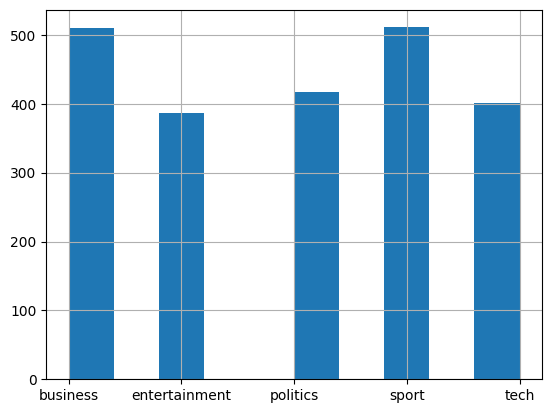

In [58]:
def update_total(text):
    ints = encoding.encode(text)
    num_token = len(ints)
    return num_token



df = pd.read_csv('/content/bbc_text_cls.csv')
df['num_token']= df['text'].apply(update_total)

print("there are token = ", df['num_token'].sum())

df['labels'].hist()

df

In [128]:
from IPython.display import Markdown, display

idx = 0

display(Markdown(df.loc[idx, "labels"]))
display(Markdown("===================================="))
display(Markdown(df.loc[idx, "text"]))

business

====================================

Ad sales boost Time Warner profit

Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.

The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.

Time Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AOL's existing customers for high-speed broadband. TimeWarner also has to restate 2000 and 2003 results following a probe by the US Securities Exchange Commission (SEC), which is close to concluding.

Time Warner's fourth quarter profits were slightly better than analysts' expectations. But its film division saw profits slump 27% to $284m, helped by box-office flops Alexander and Catwoman, a sharp contrast to year-earlier, when the third and final film in the Lord of the Rings trilogy boosted results. For the full-year, TimeWarner posted a profit of $3.36bn, up 27% from its 2003 performance, while revenues grew 6.4% to $42.09bn. "Our financial performance was strong, meeting or exceeding all of our full-year objectives and greatly enhancing our flexibility," chairman and chief executive Richard Parsons said. For 2005, TimeWarner is projecting operating earnings growth of around 5%, and also expects higher revenue and wider profit margins.

TimeWarner is to restate its accounts as part of efforts to resolve an inquiry into AOL by US market regulators. It has already offered to pay $300m to settle charges, in a deal that is under review by the SEC. The company said it was unable to estimate the amount it needed to set aside for legal reserves, which it previously set at $500m. It intends to adjust the way it accounts for a deal with German music publisher Bertelsmann's purchase of a stake in AOL Europe, which it had reported as advertising revenue. It will now book the sale of its stake in AOL Europe as a loss on the value of that stake.

# Reduce Size

there are token =  2314


<Axes: >

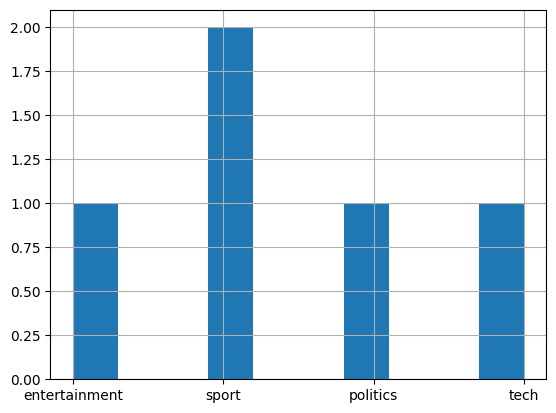

In [102]:
df_small = df.sample(5).reset_index(drop=True)
print("there are token = ", df_small['num_token'].sum())
df_small['labels'].hist()

# Importing Necessary Libraries
This section imports all the necessary libraries required for the rest of the notebook.

In [103]:
def get_embedding(text):
    text = text.replace("\n", "")
    emb = openai.embeddings.create(
        input=[text],
        model='text-embedding-3-small',
    )
    return emb.data[0].embedding



In [104]:
df_small['embeddings'] = df_small['text'].apply(get_embedding)

In [105]:
df_small

,text,labels,num_token,embeddings
0,Vera Drake scoops film award\n\nOscar hopefuls...,entertainment,438,"[-0.01564997434616089, 0.041259024292230606, -..."
1,Robinson out of Six Nations\n\nEngland captain...,sport,417,"[-0.014926258474588394, 0.05084256827831268, 0..."
2,Royal couple watch nation's mood\n\nPrince Cha...,politics,580,"[0.05881070718169212, 0.01907469518482685, 0.0..."
3,Jones medals 'must go if guilty'\n\nWorld Anti...,sport,210,"[0.03166559338569641, 0.014112689532339573, 0...."
4,Hitachi unveils 'fastest robot'\n\nJapanese el...,tech,669,"[0.022392353042960167, -0.005086322780698538, ..."


In [121]:
embedding_vector = np.array(df_small['embeddings'].tolist())

In [122]:
embedding_vector.shape

(5, 1536)

# Importing Necessary Libraries
This section imports all the necessary libraries required for the rest of the notebook.

In [126]:
import faiss

In [127]:
# Create and populate the Faiss index
d = embedding_vector.shape[1]  # Dimension of the embeddings
print("d = ",d)

index = faiss.IndexFlatL2(d)


d =  1536


In [34]:
# # we could also call faiss.normalize_L2(vectors)
# # but this isn't necessary b/c they're already normalized
#
# # won't work in this format
# index.add(df_small['embeddings'])

In [35]:
# index2 = faiss.IndexFlatL2(dims)
# index2.add(df_small[['embeddings']])

In [36]:
# vectors = df_small['embeddings'].tolist()

In [37]:
# index.add(vectors)

In [38]:
# vectors = np.array(vectors) # N x D
# index.add(vectors)

In [39]:
# print(df_small['text'].sample(random_state=1).iloc[0])

In [40]:
# query = """By what percentage did China's economy expand in 2004?"""

In [41]:
# query_emb = get_embedding(query)
# query_emb

In [42]:
# distances, indices = index.search(query_emb, k=5)

In [43]:
# query_emb = np.array(query_emb).reshape(1, -1)
# distances, indices = index.search(query_emb, k=5)

In [44]:
# distances

In [45]:
# indices

In [46]:
# df_small.iloc[indices[0][0]].text

In [47]:
# def complete(user_prompt, max_tokens=100):
#     completion = client.chat.completions.create(
#         model='gpt-3.5-turbo',
#         messages=[
#             {"role": "user", "content": user_prompt},
#         ],
#         temperature=0,
#         max_tokens=max_tokens,
#     )
#     return completion
#
# def print_response(completion):
#     content = completion.choices[0].message.content
#     print(content)

In [48]:
# def qa(question, context):
#     prompt = f"""Please answer the question given the provided \
#     context.
#
#     Question:
#
#     ```
#     {question}
#     ```
#
#     Context:
#
#     ```
#     {context}
#     ```
#     """
#
#     completion = complete(prompt)
#     print_response(completion)

In [49]:
# qa(query, df_small.iloc[indices[0][0]].text)

In [50]:
# completion = complete(query)
# print_response(completion)

In [51]:
#

In [52]:
#

In [53]:
#

In [54]:
#

![](https://deeplearningcourses.com/notebooks_v3_pxl?sc=AVRK7SgM9ASkQf5TAqs_wA&n=Embeddings+and+RAG)